# Linear Regression
This document will look at implementing simple and multiple linear regression.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing and Preparing Data

In [2]:
start_up_df = pd.read_csv(r'data\50_Startups.csv')
print("Number of Observations: " + str(start_up_df.iloc[:,1].count()))
start_up_df.head(10)

Number of Observations: 50


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Simple Linear Regression
For the simple linear regression I will focus on finding a correlation between the 2 variables R&D Spend and Profit.
To note:
- No feature scaling needed as both varibles are in USD and the numbers and data are not large so performance is not an issue.
- EDA not required as this is a simple exercise and I know that the data is complete.

In [3]:
# X is the dependant Variable
X = start_up_df.iloc[:, :1].values
# y is the target predictor
y = start_up_df.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [4]:
# Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict Test Data
y_pred = regressor.predict(X_test)

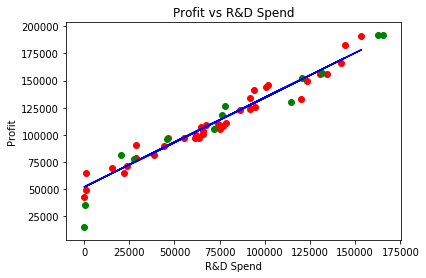

In [5]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Profit vs R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

In [6]:
# Mean Square Error of predicted data, square rooted to find average distance between the predicted line and real test values.
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

13528.135500544538


### Multiple Linear Regression
For the multiple linear regression I will focus on finding a correlation between all dependant variables and Profit.
To note:
- No feature scaling needed as all continuous varibles are in USD and the numbers and data are not large so performance is not an issue.
- City is categorical this will need to be one-hot-encoded
- EDA not required as this is a simple exercise and I know that the data is complete.

In [7]:
# X is the dependant Variable
X = start_up_df.iloc[:, :-1].values
# y is the target predictor
y = start_up_df.iloc[:, -1].values

# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# 3 transformers as there is 3 categories
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [8]:
# Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict Test Data
y_pred = regressor.predict(X_test)

In [9]:
# Mean Square Error of predicted data, square rooted to find average distance between the predicted line and real test values.
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

8797.827987215118
